In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
tf.test.is_built_with_cuda()

False

In [4]:
(X_train,y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 120s 1us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
def plot_sample(index):
    plt.figure(figsize= (10,1))
    plt.imshow(X_train[index])

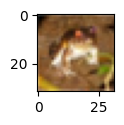

In [7]:
plot_sample(0)

In [11]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [12]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [14]:
classes[0]

'airplane'

In [15]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [17]:
X_test_scaled[0]

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

In [18]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)

y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [19]:
y_train_categorical[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [22]:
model = keras.Sequential([
    
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
    
])

model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_scaled,y_train_categorical,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 121s 77ms/step - loss: 1.8124 - accuracy: 0.3556
Epoch 2/50
1563/1563 [==============================] - 137s 87ms/step - loss: 1.6237 - accuracy: 0.4248
Epoch 3/50
1563/1563 [==============================] - 138s 88ms/step - loss: 1.5428 - accuracy: 0.4544
Epoch 4/50
1563/1563 [==============================] - 104s 67ms/step - loss: 1.4811 - accuracy: 0.4772
Epoch 5/50
1563/1563 [==============================] - 102s 65ms/step - loss: 1.4332 - accuracy: 0.4946
Epoch 6/50
1563/1563 [==============================] - 109s 70ms/step - loss: 1.3886 - accuracy: 0.5101
Epoch 7/50
1563/1563 [==============================] - 120s 77ms/step - loss: 1.3519 - accuracy: 0.5250
Epoch 8/50
1563/1563 [==============================] - 119s 76ms/step - loss: 1.3163 - accuracy: 0.5393
Epoch 9/50
1563/1563 [==============================] - 117s 75ms/step - loss: 1.2840 - accuracy: 0.5510
Epoch 10/50
1563/1563 [==============================] 

In [25]:
classes[np.argmax(model.predict(X_test_scaled)[0])]

313/313 [==============================] - 5s 15ms/step


'cat'

In [26]:
model.evaluate(X_test_scaled,y_test_categorical)

313/313 [==============================] - 5s 14ms/step - loss: 1.6378 - accuracy: 0.5547


[1.6377522945404053, 0.5547000169754028]

In [27]:
def get_model():
    model = keras.Sequential([
    
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
    
    ])

    model.compile(
        optimizer='SGD',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [28]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 120s 76ms/step - loss: 1.8109 - accuracy: 0.3553
2min 5s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
